#   JITEN MISHRA DSC430_Assignment0202_StemAndLeafDesign
##  I have not given or received any unauthorized assistance on this assignment.

### This program is designed to display stem and leaf plot for given Data sets
* DataSets used in this program are places in the same working directory.
* User who want to test this program has to first download the dataset to the working directory.
* Change the file location of file1,file2,file3 in readAndGenerateStemLeaf function of this program
* After performing the above steps then the user can try running the program

### Below is a example of The Stem and plot display for a given data set.
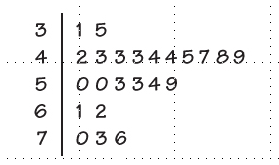

* In this program the stem and leaf implementaion is achieved with dictonary data structure
    - dictionary{ Key, Value }
    - where key is the stem and Value is a list of leafs
    - Ex : { 1: [1,2,3], 2: [4,5,6] .....}
    - **Using a dictionary is the efficient way of implementing the login since it stores data in key Value pair**
    - **And traversing and sorting the values are more convienient in this data structure**
    - **We cannot think of any other better data structure to acomplish this however this can be done with multiple
      Lists as leafs and mataining a set, maping the lists to the key values which are the stem.
      Or by creating two stacks one holding all the stems and the other holding list of leafs where you push and
      pop in the same order and can bubblesort the stem and the leafs accordingly, but all the other ways will be
      complex, time consuming, and more coding.**


* The stem and leaf is obtained with below computational steps
    - The file is read in readAndGenerateStemLeaf function and data is captured in a list ( lineList ).
    - This list is now passed to generateStemList function where the computation is done.
    - A dictionary is created to hold { stem, [list Of Leafs] }
    - Within a loop till the end of list The stem is obtained for each number with string functionality
        - ex : number = 3456  , stem = str(number)[0:-1] = 345
    - The leaf is then captured with the mod funcationality 
        - ex : number = 3456 , leaf = number%10 = 6
    - Now if this stem is in the dictionary then the leaf is appended to the existing leaf list
    - If it is not present then then stem is added to the dictionary and its leaf is added as a new list
      to the value of the dictionary
    - while performing this activity in the loop we also capture a value called appendSpace which captures the           highest length of the stem value in the data file . This values is used for formatting of the display.
    - Now the dictionary is ready and is passed to the display function printStemLeaf along with the appendSpace
    - The printStemLeaf function travers through the sorted dictionary and print the stem Leaf design in a
      format as diplayed in the above picture.
#### More discription of logics of each steps will be found inline in each function

### **The code can handle data with mixed number of digits with the help of the above logic**

### -----------------------------------------------------------------------------------------------------------------------------

In [1]:
# Main function calls the display greetings function and asking Input from user to proceed
def main():
    displayGreetings()              # Greets the User with some Info
    getInputsAndProceed()           # Ask for inputs from the user

In [2]:
# Function to display the Greeting and diplay information required for user to proceed
 
def displayGreetings():
    
    print('%80s' % "******** WELCOME TO THE STEM AND LEAF DESIGN IMPLEMENTATION ********")
    print("\n-> This program will receive input from user to select available data sets")
    print("\t- 1 for StemAndLeaf1.txt")      # 1 for the file SteamAndLeaf1.txt
    print("\t- 2 for StemAndLeaf2.txt")      # 2 for the file SteamAndLeaf1.txt
    print("\t- 3 for StemAndLeaf3.txt")      # 3 for the file SteamAndLeaf1.txt
    print("\t- 4 to Exit the program")       # 4 to Exit the code 
    print("\n-> After receiving the input it reads the dataset file and prints the steam and Leaf plot")
    print("-> This process continues till the user provide option to exit the program")
    print("\n******************************************************************************************")

# Uncomment the below code to test this cell
# displayGreetings()

In [3]:
# Function to get the input from the user and calling readAndGenerateStemLeaf to proceed

def getInputsAndProceed():
    flag = True                              # Flag to run in the loop till the user chose to exit                       
    
    while(flag):                             # Loop to run the logic with the codition as flag default(True)
        try:
            # Ask the user to input the choice from 1-3 for data file and 4 to Exit
            sel = int(input("\nEnter your choice 1-3 to Select data file 4 to Exit :: "))

            if(sel > 4):
                raise ValueError             # Raise a error if the entered value is > 4
            elif(sel == 4):
                flag = False                 # Set the flag as flase to exit the loop if value == 4
            else:
                readAndGenerateStemLeaf(sel) # Call the function to read the file and generate stem leaf
        except ValueError:                   # Catch the exception raised and print the message
            print("!!! Invalid input !!! Enter a number betwen 1-4 ::")

# Uncomment the below code to test this cell
# getInputs()

In [4]:
# Function to read the file and call the generateSteamLeaf function to generate the stem and leaf diagram
# Input : <sel> , User choice to select file or exit 
def readAndGenerateStemLeaf(sel):
    
    # variable file1, file2, file3 holds the directory location of each file to be read
    file1 = "/Users/jiten/Masters/Python- DSC430/DSC430_02/StemAndLeaf1.txt"
    file2 = "/Users/jiten/Masters/Python- DSC430/DSC430_02/StemAndLeaf2.txt"
    file3 = "/Users/jiten/Masters/Python- DSC430/DSC430_02/StemAndLeaf3.txt"
    lineList = []                            # list to hold the values from the file 
    if(sel == 1 ):
        lineList = openAndCloseFile(file1)   # when value == 1 call the func by passing file1 to get the list    
    elif (sel == 2):
        lineList = openAndCloseFile(file2)   # when value == 2 call the func by passing file2 to get the list
    elif (sel == 3):
        lineList = openAndCloseFile(file3)   # when value == 3 call the func by passing file3 to get the list
        
    generateStemLeaf(lineList)               # call function to generate stem leaf by passing the list of data

# Uncomment the below code to test this cell and the subsequnt cells
# readAndGenerateStemLeaf(3)

In [5]:
# Function to open the file, read the lines and return the list to the calling funtion
# Input: <fileName> , File Name as per the user choice selection
# return: <lineList>, List of data read from the file

def openAndCloseFile(fileName):
    
    infile = open(fileName, "r")            # opens the file in the read mode
    lineList = infile.readlines()           # reads all the lines into a list
    infile.close()                          # closes the file opened above
    return lineList                         # return the list to the calling funciton

# Uncoment the below code to  test this cell
# openAndCloseFile("/Users/jiten/Masters/Python- DSC430/DSC430_02/StemAndLeaf1.txt")

In [ ]:
# Function to compute the stem Leaf concept
# Input: <lineList>, List of data read from the file

def generateStemLeaf(lineList):
    
    myDist = {}                      # dictionary to hold the stem and leaf structure
    appendSpace = 0                  # attirbute to calculate the number of space needs to be printed in the output
    
    for i in range(0, len(lineList)): # loop from range 0 to length of the list file received
        x = int(lineList[i].strip())  # get the integer value of the string, strip to remove extra spaces if any
        stem = int(str(x)[0:-1])      # get the stem value excluding the last digit
        leaf = x%10                   # get the leaf vlaue (i.e last digit)
        
        if stem in myDist :           # check if the stem value is in the dictionary
            leafList = myDist[stem]   # get the list of leaf from dictionary of the corresponding stem
            leafList.append(leaf)     # append the new leaf value to the existing list
            myDist[stem] = leafList   # override the list with the modified list having the leafs 
        else:
            newLeafList = []               # when false create a new list
            newLeafList.append(leaf)       # append the new leaf value to the new list created
            myDist[stem] = newLeafList     # add the stem to the key of dictionary and its leaf list to the value
        if(appendSpace < len(str(stem))):  # if the appendedSpace is less than the length of current string
            appendSpace = len(str(stem))   # replace the appendedSpace to the length of current string
    
    printStemLeaf(myDist,appendSpace)      # call the print function to display the design
    
# Uncoment the below code to  test this cell
# generateStemLeaf(["12", "24", "32", "51","69", "14", "234", "4566"])    

In [7]:
# Function to display the stem and leaf design
# Input: <myDist>,       computed Dictionary having stem and leaf data
#      : <appendSpace>,  counter to append space for formating the output 

def printStemLeaf(myDist,appendSpace):
    
    for key in sorted(myDist.keys()):             # Iterate through the key of the sorted dictionary 
        keyLength = len(str(key))                 # get the length of the key
        
        # append space in from of stem as required for formating using the str. rjust and add a pipe to display
        print(str(key).rjust(appendSpace,' ') + " | ", end = '') 
        
        for value in sorted(myDist[key]):         # Iterate through the sorted value of the dictionary for its keys
            print(str(value) + " ", end = '')     # Print the leaf values with formatting 
        print()                          # Print to a new line in the next iteration

In [8]:
main() # call the main method to execute the code

            ******** WELCOME TO THE STEM AND LEAF DESIGN IMPLEMENTATION ********

-> This program will receive input from user to select available data sets
	- 1 for StemAndLeaf1.txt
	- 2 for StemAndLeaf2.txt
	- 3 for StemAndLeaf3.txt
	- 4 to Exit the program

-> After receiving the input it reads the dataset file and prints the steam and Leaf plot
-> This process continues till the user provide option to exit the program

******************************************************************************************

Enter your choice 1-3 to Select data file 4 to Exit :: 1
1 | 2 4 5 5 6 
2 | 0 0 0 2 2 3 3 5 5 6 7 9 9 
3 | 0 0 1 1 1 2 2 3 4 7 7 8 8 8 
4 | 0 0 1 1 1 1 2 3 4 4 5 5 5 6 7 9 9 9 
5 | 0 0 1 2 2 2 2 2 3 3 3 3 4 7 7 8 8 9 9 9 
6 | 0 0 0 1 1 2 2 3 4 4 4 6 7 
7 | 0 0 2 2 2 2 2 3 4 8 
8 | 0 4 5 
9 | 0 1 8 9 

Enter your choice 1-3 to Select data file 4 to Exit :: 2
 1 | 8 
 2 | 8 8 
 3 | 2 9 9 
 4 | 2 3 5 6 7 8 
 5 | 0 2 2 3 3 3 3 4 4 4 5 5 5 5 5 7 7 9 9 
 6 | 2 5 5 6 6 6 7 
 7 | 2 2 